- Импортируйте библиотеку pandas как pd. 
- Загрузите два датасета user_data и logs. 
- Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [1]:
import pandas as pd

In [4]:
user_data = pd.read_csv(r'C:\Users\arkhi\Jupyter notebook\data\user_data.csv', encoding='utf-8')

In [7]:
logs = pd.read_csv(r'C:\Users\arkhi\Jupyter notebook\data\logs.csv', encoding='utf-8')

In [11]:
user_data.shape

(2954, 3)

In [13]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [16]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [21]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [22]:
logs.shape

(4500, 4)

In [23]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [24]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [25]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


- Какой клиент совершил больше всего успешных операций? (success == True)

In [39]:
max_success = logs.query('success == True').client.value_counts().max()

In [50]:
successful_clients=(
    logs
    .query('success == True')
    .groupby('client', as_index=False)
    .agg({'platform': 'count'})
    .rename(columns={'platform': 'success_number'})
    .query('success_number == @max_success')
    .client
    .tolist()
)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

- С какой платформы осуществляется наибольшее количество успешных операций?

In [53]:
logs.groupby('platform').agg({'success':'sum'}).idxmax()

success    phone
dtype: object

- Какую платформу предпочитают премиумные клиенты?

In [58]:
user_premium = user_data.query('premium == True').client

In [61]:
logs.merge(user_premium, on ='client').platform.value_counts().idxmax()

'phone'

- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

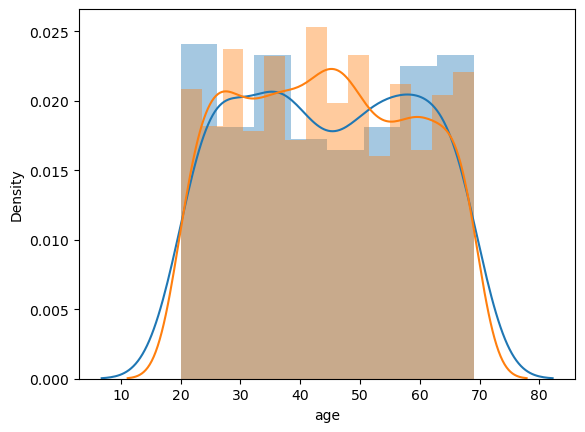

In [77]:
sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)

C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

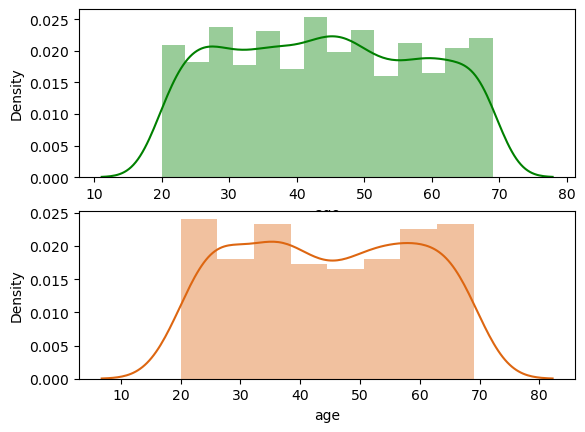

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(user_data.query('premium == False').age, ax=ax[0], color = 'green')
sns.distplot(user_data.query('premium == True').age, ax=ax[1], color = '#DD6611')

- Постройте график распределения числа успешных операций

C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

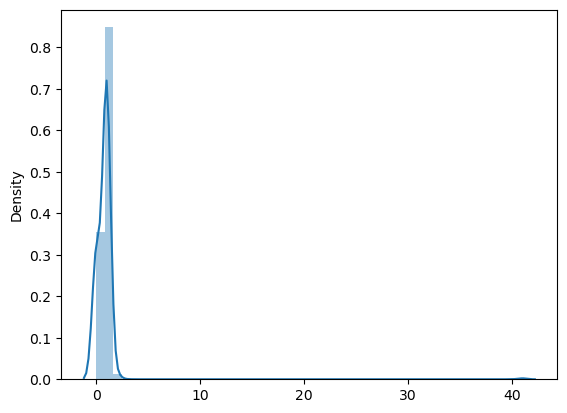

In [97]:
sns.distplot(logs.groupby('client').agg({'success':'sum'}))

- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

<AxesSubplot:xlabel='age', ylabel='success'>

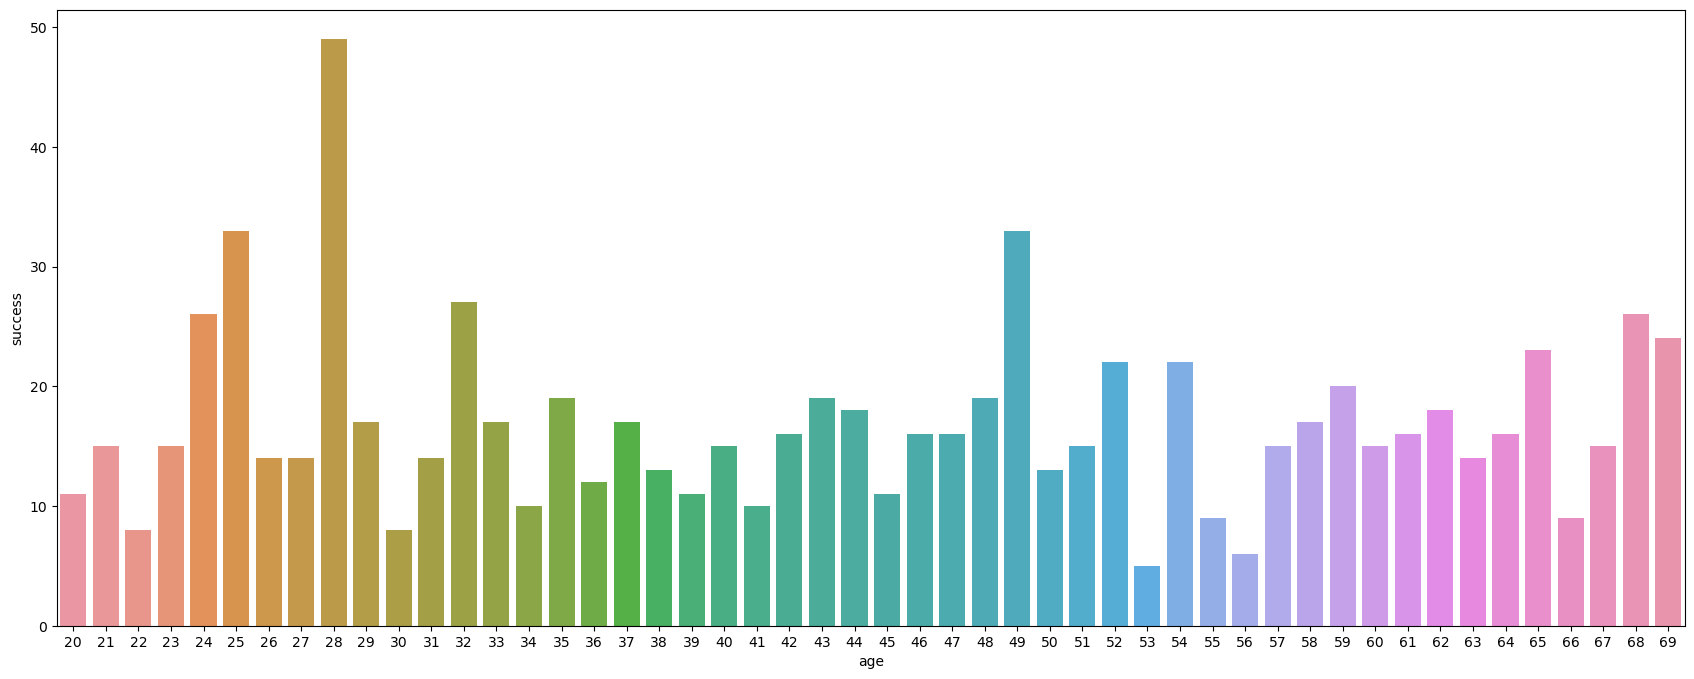

In [116]:
data=user_data.merge(logs).query('platform == "computer"').groupby('age',as_index=False).agg({'success':'sum'})
plt.figure(figsize=(21,8))
sns.barplot( x=data.age, y=data.success)

<AxesSubplot:xlabel='age', ylabel='count'>

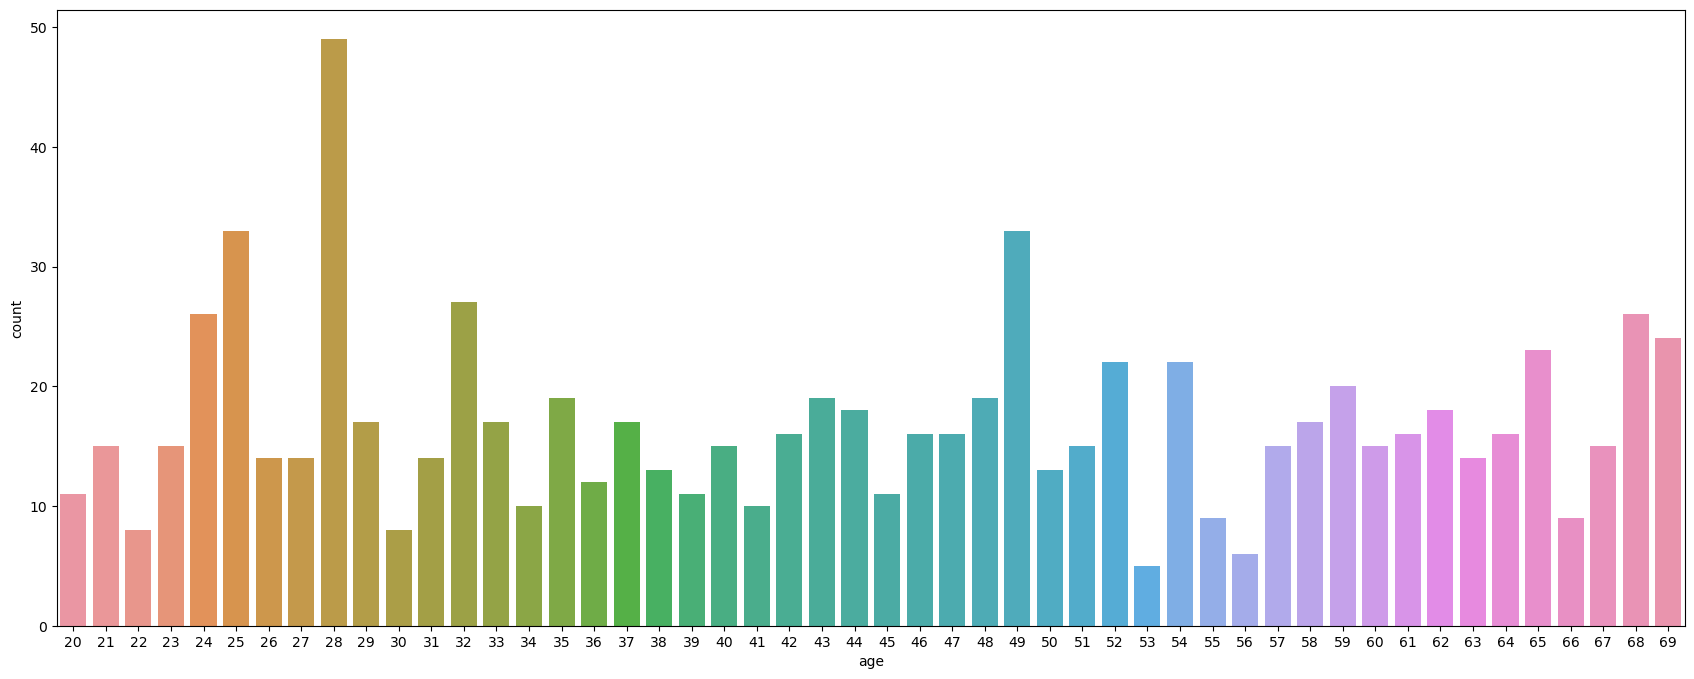

In [126]:
df = user_data.merge(logs).query('platform == "computer" and success == True')
plt.figure(figsize=(21,8))
sns.countplot(data=df, x='age')

# That's all!!!